<a href="https://colab.research.google.com/github/SanskarAgrahari-07/Deep-Learning-and-Neural-Networks-Lab-Work/blob/main/Lab_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

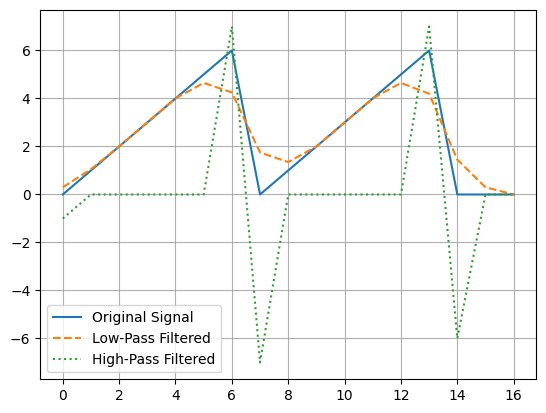

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = [0,1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 0, 0]
H_L = [0.05, 0.2, 0.5, 0.2, 0.05]
H_H = [-1, 2, -1]

y_low = np.convolve(X, H_L, mode='same')
y_high = np.convolve(X, H_H, mode='same')

plt.plot(X, label='Original Signal')
plt.plot(y_low, label='Low-Pass Filtered', linestyle='dashed')
plt.plot(y_high, label='High-Pass Filtered', linestyle='dotted')
plt.legend()
plt.grid()
plt.show()


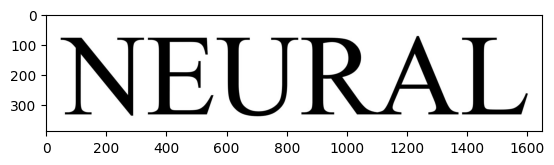

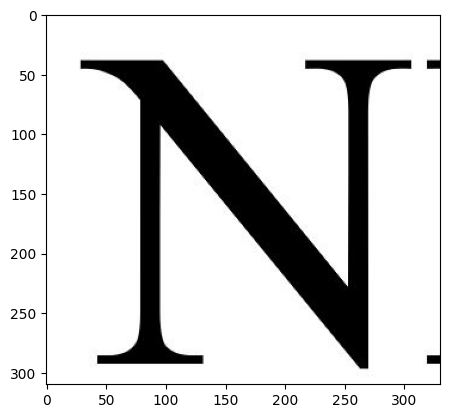

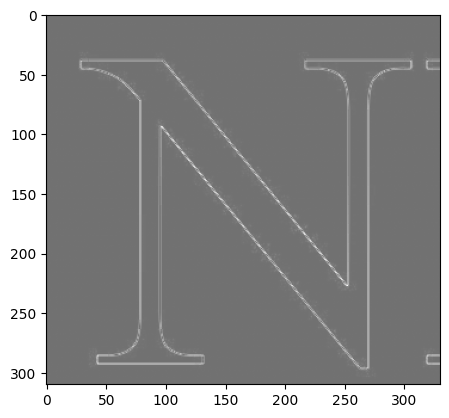

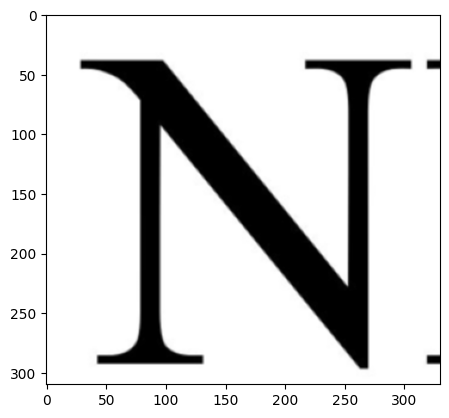

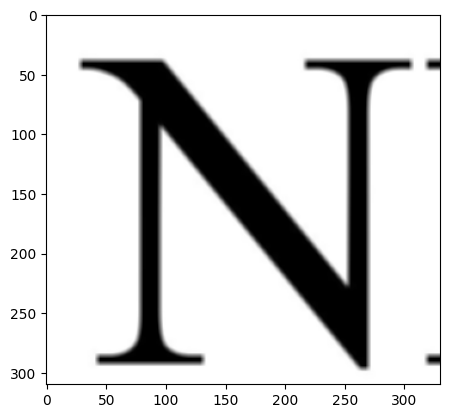

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from skimage.io import imread
from skimage.color import rgb2gray

# Read the image
im = imread(r"/content/Neural.JPG")
img = rgb2gray(im) * 255  # Convert to grayscale and scale

# Display the full image
plt.imshow(img, cmap='gray')
plt.show()

# Crop the image
img1 = img[40:350, 20:350]
plt.imshow(img1, cmap='gray')
plt.show()

# Define filters
fil1 = np.array([[ 0, -1,  0],
                 [-1,  4, -1],
                 [ 0, -1,  0]])

fil2 = np.array([[0.2, 0.5, 0.2],
                 [0.5, 1.0, 0.5],
                 [0.2, 0.5, 0.2]])

fil3 = np.full((5, 5), 0.1)  # Averaging filter

# Apply convolution
grad1 = signal.convolve2d(img1, fil1, boundary='symm', mode='same')
grad2 = signal.convolve2d(img1, fil2, boundary='symm', mode='same')
grad3 = signal.convolve2d(img1, fil3, boundary='symm', mode='same')

# Display filtered images
plt.imshow(abs(grad1), cmap='gray', vmin=np.min(grad1), vmax=np.max(grad1))
plt.show()

plt.imshow(grad2, cmap='gray')
plt.show()

plt.imshow(grad3, cmap='gray')
plt.show()


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)

100%|██████████| 427M/427M [00:03<00:00, 124MB/s] 

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


In [ ]:
import os
import zipfile

# Create the .kaggle directory
!mkdir -p ~/.kaggle

# Move kaggle.json to the .kaggle directory
!mv kaggle.json ~/.kaggle/

# Set permissions
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d techsash/waste-classification-data --unzip

Dataset URL: https://www.kaggle.com/datasets/techsash/waste-classification-data
License(s): CC-BY-SA-4.0
 99% 423M/427M [00:03<00:00, 133MB/s]
100% 427M/427M [00:03<00:00, 113MB/s]


In [ ]:
!ls DATASET/TEST/O


O_12568.jpg  O_12769.jpg  O_12970.jpg  O_13171.jpg  O_13372.jpg  O_13573.jpg  O_13774.jpg
O_12569.jpg  O_12770.jpg  O_12971.jpg  O_13172.jpg  O_13373.jpg  O_13574.jpg  O_13775.jpg
O_12570.jpg  O_12771.jpg  O_12972.jpg  O_13173.jpg  O_13374.jpg  O_13575.jpg  O_13776.jpg
O_12571.jpg  O_12772.jpg  O_12973.jpg  O_13174.jpg  O_13375.jpg  O_13576.jpg  O_13777.jpg
O_12572.jpg  O_12773.jpg  O_12974.jpg  O_13175.jpg  O_13376.jpg  O_13577.jpg  O_13778.jpg
O_12573.jpg  O_12774.jpg  O_12975.jpg  O_13176.jpg  O_13377.jpg  O_13578.jpg  O_13779.jpg
O_12574.jpg  O_12775.jpg  O_12976.jpg  O_13177.jpg  O_13378.jpg  O_13579.jpg  O_13780.jpg
O_12575.jpg  O_12776.jpg  O_12977.jpg  O_13178.jpg  O_13379.jpg  O_13580.jpg  O_13781.jpg
O_12576.jpg  O_12777.jpg  O_12978.jpg  O_13179.jpg  O_13380.jpg  O_13581.jpg  O_13782.jpg
O_12577.jpg  O_12778.jpg  O_12979.jpg  O_13180.jpg  O_13381.jpg  O_13582.jpg  O_13783.jpg
O_12578.jpg  O_12779.jpg  O_12980.jpg  O_13181.jpg  O_13382.jpg  O_13583.jpg  O_13784.jpg
O_12579.jp

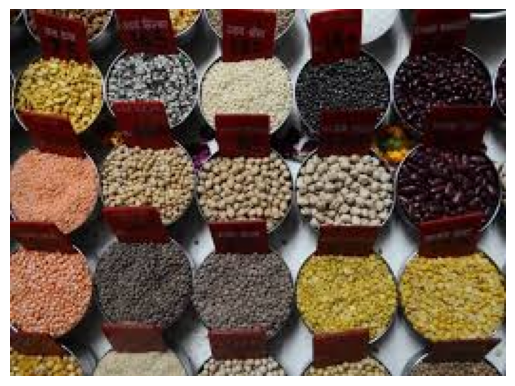

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Define path to images
image_folder = "DATASET/TEST/O"  # Update based on folder structure
image_files = os.listdir(image_folder)

# Read and display the first image
img_path = os.path.join(image_folder, image_files[0])
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for proper display

plt.imshow(img)
plt.axis("off")
plt.show()

In [18]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset path
dataset_path = "/content/DATASET/TEST/O"

In [19]:
dataset_path


'/content/DATASET/TEST/O'

In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset path
dataset_path = "/content/DATASET/TEST/O"  # Update based on your dataset structure

# Image preprocessing & augmentation
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values (0-1)
    validation_split=0.2  # 80% training, 20% validation
)

# Load training data
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),  # Resize images
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Load validation data
val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Get the number of classes
num_classes = len(train_generator.class_indices)
print("Number of Classes:", num_classes)


Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Number of Classes: 0


In [21]:

train_dir = '/content/DATASET/TRAIN'
test_dir = '/content/DATASET/TEST'

In [22]:


batch_size = 32
img_height = 64
img_width = 64

In [23]:

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 22564 files belonging to 2 classes.
Using 18052 files for training.


In [24]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 2513 files belonging to 2 classes.
Using 502 files for validation.


In [25]:
class_names = train_ds.class_names
print(class_names)

['O', 'R']


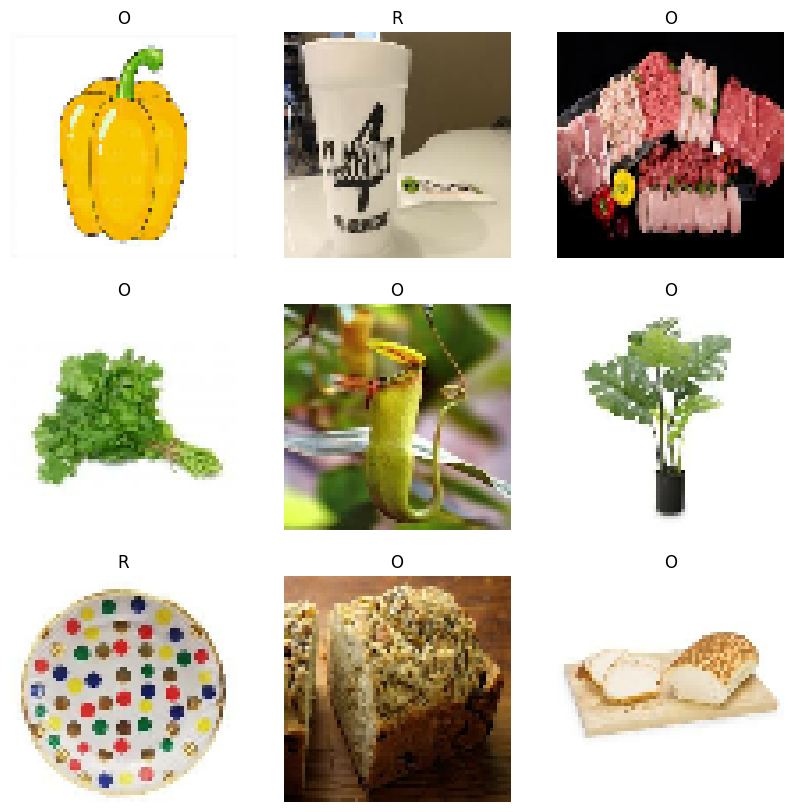

In [26]:
plt.figure(figsize= (10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

In [27]:

for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 64, 64, 3)
(32,)


In [28]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset paths
train_dir = '/content/DATASET/TRAIN'
test_dir = '/content/DATASET/TEST'

# Image preprocessing & augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,        # Normalize pixel values (0-1)
    rotation_range=20,      # Data Augmentation
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test set

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Resize images
    batch_size=32,
    class_mode='categorical'  # Multi-class classification
)

# Load testing data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Get number of classes
num_classes = len(train_generator.class_indices)
print("Number of Classes:", num_classes)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.
Number of Classes: 2


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Build the Fully Connected Network
model = Sequential([
    Flatten(input_shape=(128, 128, 3)),  # Convert 3D image to 1D vector
    Dense(512, activation='relu'),
    Dropout(0.5),  # Prevent overfitting
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')  # Output layer with softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 49152)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │      25,166,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,330,818 (96.63 MB)

 Trainable params: 25,330,818 (96.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# Train the model
history = model.fit(
    train_generator,
    validation_data=test_generator,  # Use test data as validation
    epochs=20,  # Adjust epochs if needed
    verbose=1
)

Epoch 1/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 494s 693ms/step - accuracy: 0.5913 - loss: 3.5484 - val_accuracy: 0.7979 - val_loss: 0.4624
Epoch 2/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 479s 679ms/step - accuracy: 0.6369 - loss: 0.6228 - val_accuracy: 0.8150 - val_loss: 0.5199
Epoch 3/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 473s 669ms/step - accuracy: 0.6231 - loss: 0.6312 - val_accuracy: 0.8583 - val_loss: 0.5618
Epoch 4/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 471s 667ms/step - accuracy: 0.6992 - loss: 0.5870 - val_accuracy: 0.8448 - val_loss: 0.5128
Epoch 5/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 473s 670ms/step - accuracy: 0.7007 - loss: 0.5823 - val_accuracy: 0.7593 - val_loss: 0.5233
Epoch 6/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 468s 663ms/step - accuracy: 0.7012 - loss: 0.5782 - val_accuracy: 0.8571 - val_loss: 0.5007
Epoch 7/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 474s 671ms/step - accuracy: 0.7169 - loss: 0.5673 - val_accuracy: 0.8341 - val_loss: 0.4748
Epoch 8/20
 41/706 ━━━━━━━━━━━━━━━━━━━━ 7:21 664ms/step - accuracy: 0.7255 -

In [ ]:
import matplotlib.pyplot as plt

# Plot Training & Validation Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs Validation Loss')
plt.legend()
plt.show()